In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
data=pd.read_csv("Fraud.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
83556,10,PAYMENT,7705.70,C1834114901,96490.0,88784.30,M1214836727,0.00,0.00,0.0,0.0
83557,10,CASH_OUT,319045.01,C1964329082,56471.0,0.00,C699133054,0.00,319045.01,0.0,0.0
83558,10,CASH_IN,249169.96,C1421944154,3481.0,252650.96,C790672270,38177.07,0.00,0.0,0.0
83559,10,CASH_OUT,244279.64,C722886752,29968.0,0.00,C1492538502,25680.00,269959.64,0.0,0.0


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,83561.000000,8.356100e+04,8.356000e+04,8.356000e+04,8.356000e+04,8.356000e+04,83560.000000,83560.0
mean,8.204473,1.684883e+05,8.888170e+05,9.055016e+05,8.661407e+05,1.180913e+06,0.001340,0.0
std,1.859640,3.363563e+05,2.731026e+06,2.769537e+06,2.397540e+06,2.826509e+06,0.036587,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.550620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,4.873624e+04,1.987300e+04,0.000000e+00,1.938916e+04,3.685593e+04,0.000000,0.0
75%,9.000000,2.056751e+05,1.795912e+05,2.019698e+05,5.561267e+05,1.019467e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.130692e+07,3.197699e+07,1.000000,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83561 entries, 0 to 83560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            83561 non-null  int64  
 1   type            83561 non-null  object 
 2   amount          83561 non-null  float64
 3   nameOrig        83561 non-null  object 
 4   oldbalanceOrg   83560 non-null  float64
 5   newbalanceOrig  83560 non-null  float64
 6   nameDest        83560 non-null  object 
 7   oldbalanceDest  83560 non-null  float64
 8   newbalanceDest  83560 non-null  float64
 9   isFraud         83560 non-null  float64
 10  isFlaggedFraud  83560 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 7.0+ MB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.076745,-0.000424,-0.000435,0.005363,0.012122,-0.051344,NaN
amount,0.076745,1.000000,-0.005449,-0.011740,0.255485,0.378980,0.041582,NaN
oldbalanceOrg,-0.000424,-0.005449,1.000000,0.998923,0.107843,0.075448,-0.004387,NaN
newbalanceOrig,-0.000435,-0.011740,0.998923,1.000000,0.109723,0.074773,-0.011580,NaN
oldbalanceDest,0.005363,0.255485,0.107843,0.109723,1.000000,0.934949,-0.010200,NaN
newbalanceDest,0.012122,0.378980,0.075448,0.074773,0.934949,1.000000,-0.007017,NaN
isFraud,-0.051344,0.041582,-0.004387,-0.011580,-0.010200,-0.007017,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


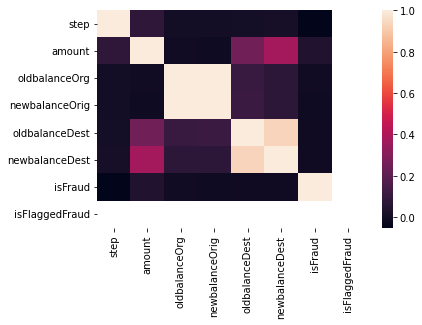

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.fillna(0)
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
83555,10,CASH_OUT,14895.17,C214279684,51759.0,36863.83,C1298314970,979963.09,994858.25,0.0,0.0
83556,10,PAYMENT,7705.70,C1834114901,96490.0,88784.30,M1214836727,0.00,0.00,0.0,0.0
83557,10,CASH_OUT,319045.01,C1964329082,56471.0,0.00,C699133054,0.00,319045.01,0.0,0.0
83558,10,CASH_IN,249169.96,C1421944154,3481.0,252650.96,C790672270,38177.07,0.00,0.0,0.0


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

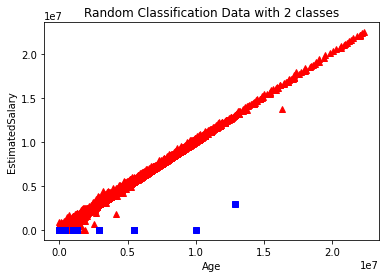

In [4]:
data=pd.read_csv("Fraud.csv")
data
X= data[['oldbalanceOrg', 'newbalanceOrig']].to_numpy()
y= data['isFraud'].to_numpy()

#Plotting
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("oldbalanceOrg")
plt.ylabel("newbalanceOrig")
plt.title('Random Classification Data with 2 classes')

In [8]:

data1=data.head(100)
data1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0.0,0.0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0.0,0.0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0.0,0.0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0.0,0.0


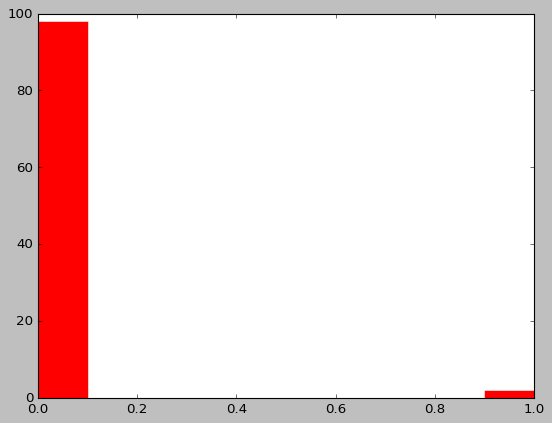

In [9]:
plt.style.use('classic')

# make data

x = data1['isFraud']
# plot:
fig, ax = plt.subplots()

ax.hist(x,  linewidth=0.5, edgecolor="white",color = "red")



plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


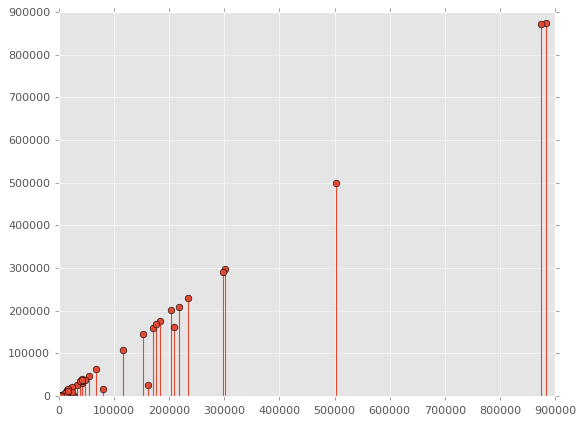

In [10]:
plt.style.use('ggplot')

x = data1['oldbalanceOrg']
y = data1['newbalanceOrig']


# plot
fig, ax = plt.subplots()

ax.stem(x, y)



plt.show()

In [11]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [12]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


In [15]:
data.drop(['isFlaggedFraud'], axis=1, inplace=True)

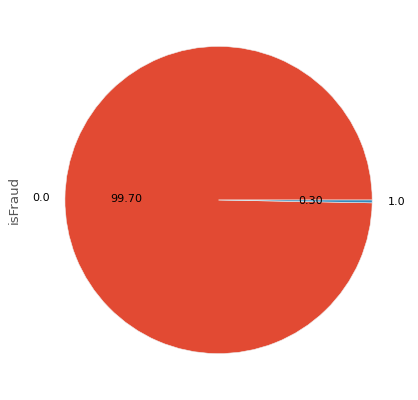

In [16]:
data['isFraud'].value_counts().plot.pie(autopct='%.2f');